# DADA ABIOLA
## Python presentation 2
### Project submitted to zacrac integrated company
#### 2nd Of October 2020
#### Objective(s): The company is trying to decide whether to focus thier effort on their mobile app experience or their website.

Assumptions underlying Multiple Linear Regression

- <p><font color= red>Multivariate Normality: Multiple regression assumes that the residuals are normally distributed</font></p>
- <p><font color= red>There must be a linear relationship between the outcome variable and the independent variables.</font></p>
- <p><font color= red>Multiple linear regression requires at least two independent variables, which can be nominal, ordinal, or interval/ratio level variables</font></p>




 
 
### problem outline
Congratulations! You just got some contract work with an Ecommerce company based in Nigeria (Abuja city) that sells clothing online but also have in-store stlye and clothing advice sessions. Customers come in to the store, have session/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

**The company is trying to decide whether to focus thier effort on their mobile app experience or their website. They've hired you on contract to help them figure it out.**


*Note: You can visit kaggle.com for more information on similar project*

**Instructions**
*  Use 'darkgrid' as your plotting syle background 
*  Read all Questions very well before answering
* use markdown to type your intrepretaions where necessary
*  just follow through the questions and supply your answers to the empty cells below

### Imports
#### Import all the necessary dependencies 

In [248]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Get the Data
The Ecommerce Customer csv file has the Customer info, such as Email, Address, and their color Avatar. and its numerical columns are:
* Avg.Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Memebership: How many years the customer has been a member.

In [249]:
pwd

'C:\\Users\\User\\Desktop\\Zacrac training\\Python_presentation_2'

#### Read in the Ecommerce Customers csv file as a DatFrame called df or any convenient variable name

In [250]:
df = pd.read_csv('C:\\Users\\User\\Desktop\\Zacrac training\\Python_presentation_2\\Ecommerce Customers')

#### Check the head, info and describe methods 

In [252]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [254]:
df2 = df.drop(['Email','Address','Avatar'], axis=1)
df2

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
5,33.871038,12.026925,34.476878,5.493507,637.102448
6,32.021596,11.366348,36.683776,4.685017,521.572175
7,32.739143,12.351959,37.373359,4.434273,549.904146
8,33.987773,13.386235,37.534497,3.273434,570.200409
9,31.936549,11.814128,37.145168,3.202806,427.199385


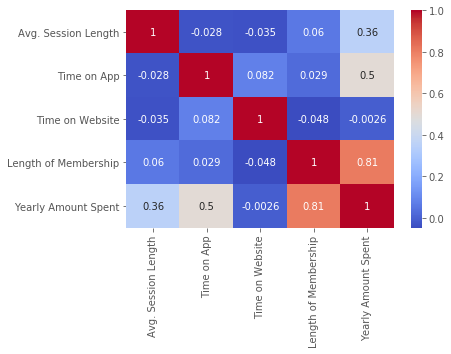

In [255]:
sns.heatmap(df2.corr(), cmap='coolwarm', annot =True)

#### Check for mising or null values using heatmap

In [223]:
#sns.heatmap(df.isnull(),cmap='viridis', yticklabels=False)

## Exploratory Data Analysis (EDA)
### Explore the dataset
Use the numerical columns of the dataset alone for the EDA

#### Create a jointplot to compare trhe Time on webste and Yearly Amount Spent columns. what can you say about the correlation?

In [224]:
#sns.jointplot(x = 'Time on Website', y ='Yearly Amount Spent', data = df)

In [225]:
#df.columns

#### Create another joint plot for Time on App and Yearly Amount spent

In [226]:
#sns.jointplot(x = df['Time on App'], y =df['Yearly Amount Spent'])

#### Using jointplot, create a 2D hex bin plot comapring Time on App and Length of Membership

In [227]:
#sns.jointplot(x = df['Time on App'], y =df['Length of Membership'], kind='hex', color='magenta')

#### Create a pairplot to explore the relationship across the entire data set

In [228]:
#sns.pairplot(df)

#### Based off the pairplot above what looks to be the most correlated feature with Yearly Amount Spent?

Yearly Amount Spent is most correlated with Lenght of membership 

#### Create a linear model plot of Yearly Amount Spent vs length of Membership. What can you say about the plot?

In [229]:
#sns.lmplot(x='Yearly Amount Spent', y='Length of Membership', data=df, markers='v')

In [230]:
#sns.lmplot(x='Yearly Amount Spent', y='Time on App', data=df, markers='v')

## Training and Testing Data

Now that we've explored the dataset a bit. go ahead and split the data into training and testing sets.
**Set a varaibele X equal to the numerical features of the customer and a variable y equal to the "Yearly Amount Spent" column**

In [231]:
#X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [232]:
#y= df['Yearly Amount Spent']

#### Use cross_validation.train_test_split from sklearn to split the data into training and testing sets. set test_size=0.3 and random_state=101

In [233]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state= 101)

In [234]:
#X_train.head()

In [235]:
#X_test.head()

#### Training the Model
#### Import LinearRegression from sklearn and train the model

In [236]:
#from sklearn.linear_model import LinearRegression

#### Create an instance of a LinearRegression() model named lm

In [237]:
#lm = LinearRegression()

#### Train/fit lm on the training data

In [238]:
#result = lm.fit(X_train, Y_train)

#### Print out the coefficients of the model

In [239]:
#lm.coef_

## Predicting Test Data
Now that you've fit the model. evaluate its perfromance by predicting off the test values!
#### Use lm.predict to predict off the X_test set of the data

#### Create a scatterplot of the real test values versus the predicted values

In [192]:
#predicting_values = lm.predict(X_test)

In [240]:
#df2 = pd.DataFrame( predicting_values, Y_test, columns=['prediction']).reset_index()
#df2['residual'] = df2['Yearly Amount Spent'] - df2['prediction']
#df2.head()

In [241]:
#plt.scatter(Y_test, predicting_values)
#plt.xlabel('Test value of Y')
#plt.ylabel('Predicted values of Y')
#plt.title('Plot of test vs predicted values of Y')

## Evaluating the Model
Evaluate the model performance by calculating the residual sum of squares and the explained varaince score(R^2)
#### Claculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [242]:
#from sklearn import metrics
#MAE = metrics.mean_absolute_error(Y_test, predicting_values)
#MSE = metrics.mean_squared_error(Y_test, predicting_values)
#print(f'MAE: {MAE} \nMSE: {MSE} \nRMSE: {MSE**0.5}')

In [243]:
#metrics.explained_variance_score(Y_test, predicting_values)

## Residuals
explore the residuals to make sure evrything was okay with you data
#### plot a histogram of the residuals and make sure it looks normally distributed.Use either seaborn or matplot

In [247]:
#residuals = Y_test-predicting_values
#sns.distplot(df2['residual'], bins = 50)

#### Print out the OLS model summary

In [245]:
#X2 = sm.add_constant(X)
#results = sm.OLS(y, X2).fit()
#results.summary() 

## Conclusion
we still want to figure out the answer to the original question, do we focus our effort
on mobile app or website development?

*Hint: print out the coefficents in a dataframe format and use to interpret.*

In [197]:
#coefficients = pd.DataFrame( {'coefficients': lm.coef_} ,
#                            index =['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership'])
#coefficients

,coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


#### How can you interpret the coefficients above, use the cell below as markdown for interpretation

- for every 1 unit increase in 'Avg. Session Lenght', the 'Yearly Amount Spent' increases by approximately 26 units.
- for every 1 unit increase in 'Time on App', the 'Yearly Amount Spent' increases by approximately 39 units.
- for every 1 unit increase in 'Time on Website', the 'Yearly Amount Spent' increases by approximately 0.1 units.
- for every 1 unit increase in 'Lenght of Membership', the 'Yearly Amount Spent' increases by approximately 61 units.

#### Do you think the company should focus more their mobile app or on their website?

In [198]:
#type ur answer here The company should focus more on their mobile app 

## Great Job! Thank You
###### *Instructor: Oluyemmy*